# Response function of a moving average
#### by Elizabeth Barnes

Ever wonder what a moving average is doing to your data in frequency-space? Well - you're about to find out!

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

#.............................................
# PLOTTING COMMANDS
#.............................................
LW = 2  #linewidth
LFS = 6 #legend fontsize

### Get your data together

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


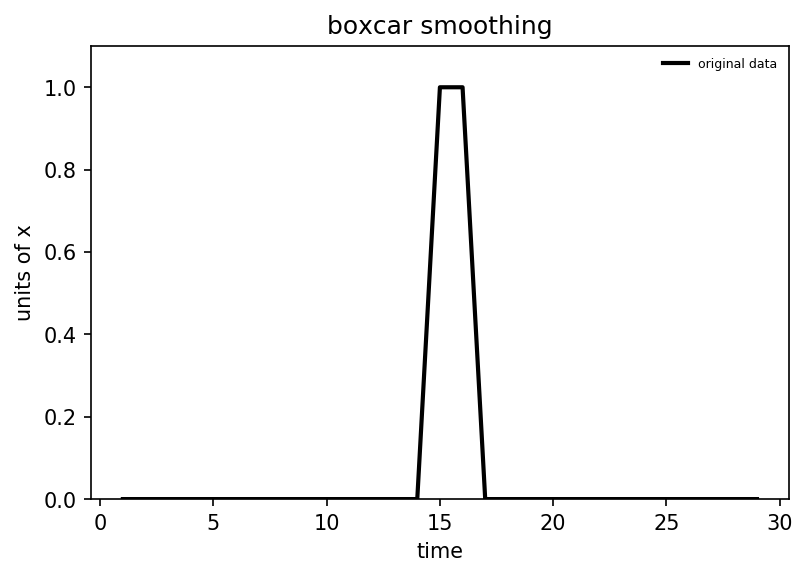

In [10]:
#t = np.arange(1,4000)
t = np.arange(1,30)

x = np.zeros(np.shape(t))
x[int(np.size(t)/2):int(np.size(t)/2+2)] = np.ones((2,))
#x = np.random.rand(np.size(t))
print(x)

plt.figure()
plt.title('boxcar smoothing');
plt.plot(t,x,'-k',linewidth = LW, label ='original data')
plt.ylim(0,1.1)
plt.xlabel('time')
plt.ylabel('units of x')
plt.legend(frameon = False, fontsize = LFS)
plt.show()

First we define a simple data set x that is zeros everywhere except for two values in the middle that are 1.0.

### Apply the filter in time-space and see what the resulting curve looks like

Next, let's apply a 3-day moving window to x. We could write such a loop ourselves, or we could make use of built-in functions that do this convolution for us! In this case, I use sig.lfilter(). 

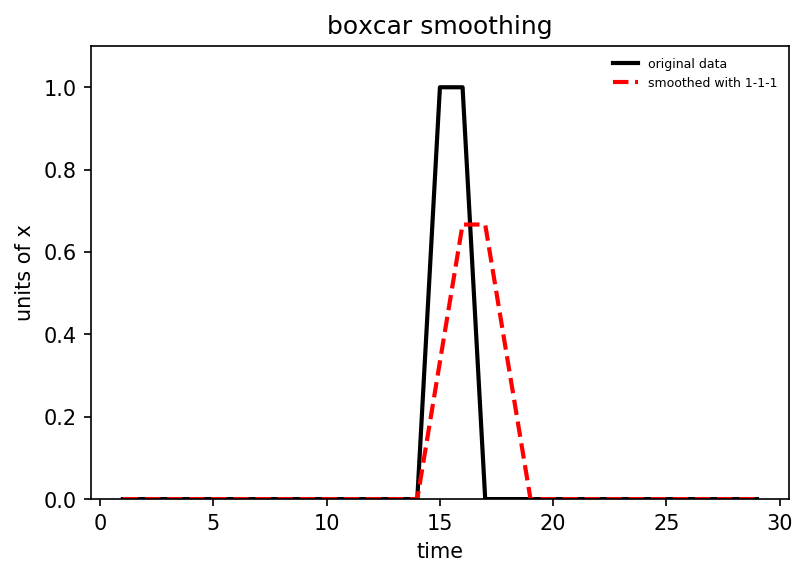

In [11]:
# define my moving average window
g = [1., 1., 1.] #in this case, a 3-day moving window

# apply the moving average window using a "filter" function to do the loop for me
y1 = sig.lfilter(g,np.sum(g),x)

plt.figure()
plt.title('boxcar smoothing');
plt.plot(t,x,'-k',linewidth = LW, label ='original data')
plt.plot(t,y1,'--r',linewidth = LW, label = 'smoothed with 1-1-1' )
plt.ylim(0,1.1)
plt.xlabel('time')
plt.ylabel('units of x')
plt.legend(frameon = False, fontsize = LFS)
plt.show()

Notice that the data is indeed smoothed - but also phase shifted to the right! This is because of how [sig.lfilter()](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.lfilter.html) is setup in python to perform a left-centered filter.

Now, let's apply another 1-1-1 filter to our already smoothed data (i.e. the red curve above).

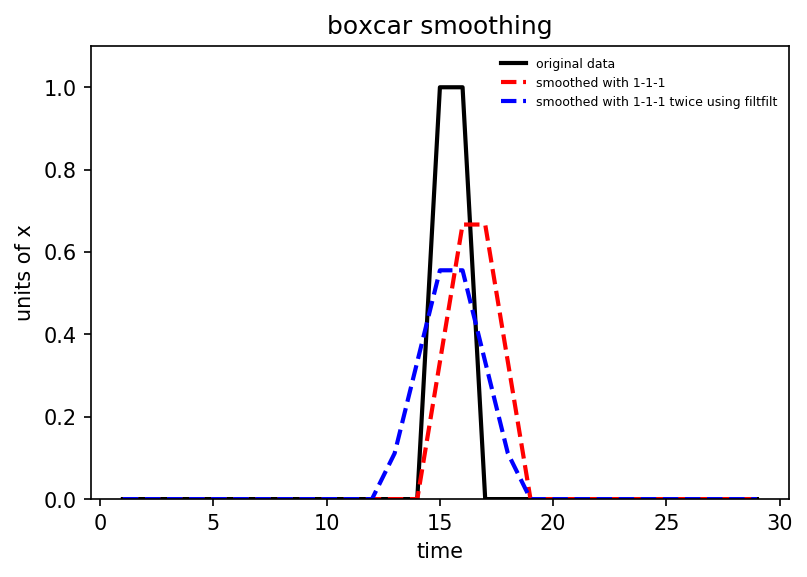

In [12]:
y2 = sig.filtfilt(g,np.sum(g),x) #filtfilt goes forwards and backwards to remove the phase shift

plt.figure()
plt.title('boxcar smoothing');
plt.plot(t,x,'-k',linewidth = LW, label ='original data')
plt.plot(t,y1,'--r',linewidth = LW, label = 'smoothed with 1-1-1' )
plt.plot(t,y2,'--b',linewidth = LW, label = 'smoothed with 1-1-1 twice using filtfilt' )
plt.legend(frameon = False, fontsize = LFS)
plt.ylim(0,1.1)
plt.xlabel('time')
plt.ylabel('units of x')
plt.show()

A trick here is that by using the function "sig.filtfilt()" we have applied the same filter twice (in this case g = [1 1 1]) first forward and _then backward_ to remove the phase shift we got above! Just to show you what would have happened had we not used sig.filtfilt, look below. In this case, we just apply the exact same 1-1-1 filter to y1 (the red curve above) to get the orange curve.

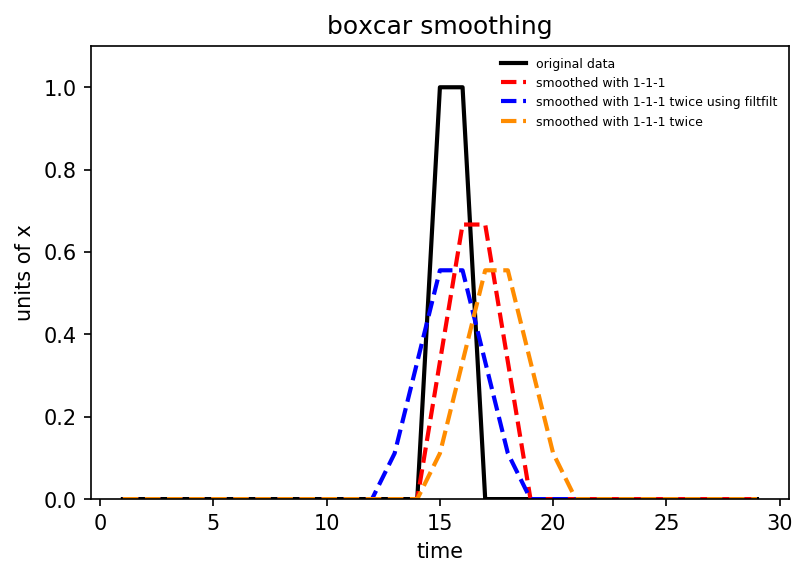

In [13]:
y22 = sig.lfilter(g,np.sum(g),y1) #filtfilt goes forwards and backwards to remove the phase shift

plt.figure()
plt.title('boxcar smoothing');
plt.plot(t,x,'-k',linewidth = LW, label ='original data')
plt.plot(t,y1,'--r',linewidth = LW, label = 'smoothed with 1-1-1' )
plt.plot(t,y2,'--b',linewidth = LW, label = 'smoothed with 1-1-1 twice using filtfilt' )
plt.plot(t,y22,'--',color='darkorange',linewidth = LW, label = 'smoothed with 1-1-1 twice' )
plt.legend(frameon = False, fontsize = LFS)
plt.ylim(0,1.1)
plt.xlabel('time')
plt.ylabel('units of x')
plt.show()

We now see that this curve is even more phase shifted. This should teach you two things:
* know what your software is doing!
* filtfilt (or forward-backward applications of filters) can be very handy

### Compute the response functions from the data and from theory

The question is now - what does this smoothing with a 1-1-1 filter do to our data in frequency space? This is known as the "response function". We are going to calculate these response functions in two ways:
* from theory (see lecture notes)
* from the ratio of the power spectrum of the smoothed data to the power spectrum of the original raw data

In [14]:
# calculate the FFTs of the original data, the 1-1-1 smoothed data, and the data smoothed with a 1-1-1 twice
Z_x = np.fft.fft(x)/np.size(x)
Z_y1 = np.fft.fft(y1)/np.size(y1)
Z_y2 = np.fft.fft(y2)/np.size(y2)

# compute the power spectrum by squaring the FFT (and taking only first half)
Ck2_x = np.abs(Z_x[0:int(np.size(Z_x)/2 + 1)])**2
Ck2_y1 = np.abs(Z_y1[0:int(np.size(Z_y1)/2 + 1)])**2
Ck2_y2 = np.abs(Z_y2[0:int(np.size(Z_y2)/2 + 1)])**2

# compute the response function from theory
freq = np.arange(0,np.size(x)/2)/float(np.size(x))

Rg_y1 = 1./3 + (2./3)*np.cos(freq*2.*np.pi)
Rg2_y1 = Rg_y1**2
Rg_y2 = (1./3 + (2./3)*np.cos(freq*2*np.pi))**2
Rg2_y2 = Rg_y2**2

### Plot the spectrum after filtering

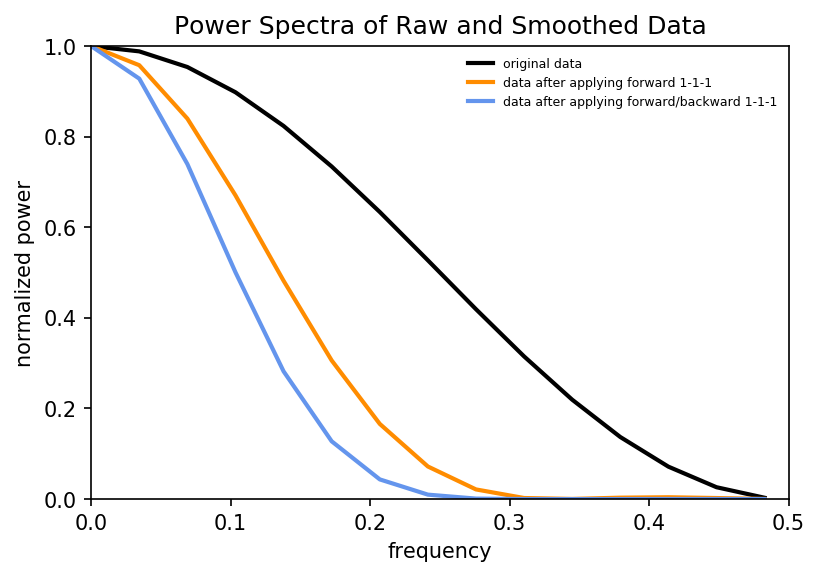

In [15]:
#%% plot normalized spectrum of the raw data and smoothed data
maxval = np.max(Ck2_x)

plt.figure()
plt.title('Power Spectra of Raw and Smoothed Data')

plt.plot(freq,Ck2_x/maxval,'-k',linewidth = LW, label = 'original data')
plt.plot(freq,Ck2_y1/maxval,'-',color='darkorange',linewidth = LW, \
         label = 'data after applying forward 1-1-1')
plt.plot(freq,Ck2_y2/maxval,'-',color='cornflowerblue',linewidth = LW, \
         label = 'data after applying forward/backward 1-1-1')

plt.legend(fontsize = LFS, frameon = False)

plt.ylim(0,1)
plt.xlim(0,.5)
plt.xlabel('frequency')
plt.ylabel('normalized power')
plt.show()

### Plot the theoretical squared response functions and compare to our data

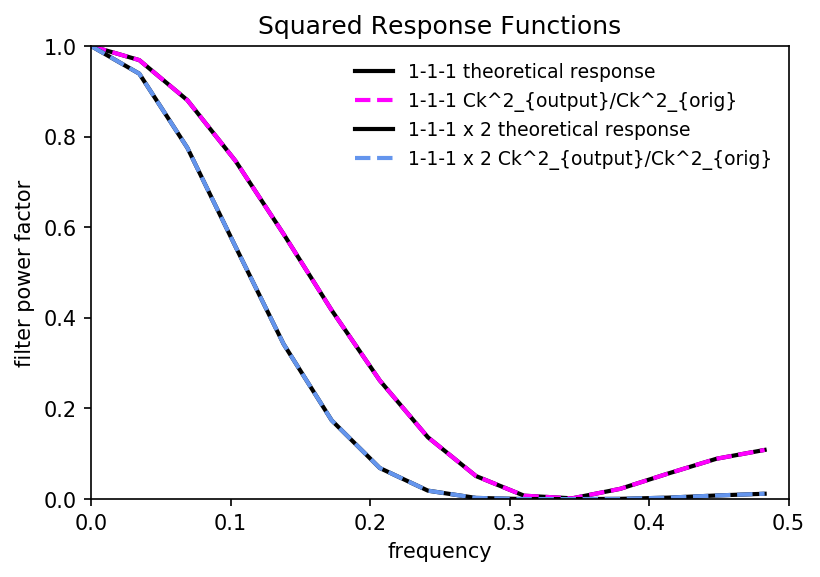

In [16]:
plt.figure()
plt.title('Squared Response Functions')

plt.plot(freq,Rg2_y1,'-k',linewidth = LW, label = '1-1-1 theoretical response')
plt.plot(freq,Ck2_y1/Ck2_x,'--',color='fuchsia',linewidth = LW, label = '1-1-1 Ck^2_{output}/Ck^2_{orig}')

plt.plot(freq,Rg2_y2,'-k',linewidth = LW, label = '1-1-1 x 2 theoretical response')
plt.plot(freq,Ck2_y2/Ck2_x,'--',color = 'cornflowerblue',linewidth = LW, label = '1-1-1 x 2 Ck^2_{output}/Ck^2_{orig}')

plt.ylim(0,1)
plt.xlim(0,.5)
plt.legend(fontsize = LFS*1.5, frameon = False)
plt.ylabel('filter power factor')
plt.xlabel('frequency')
plt.show()

We see that indeed, the theory and data agree perfectly! Wow! In addition, we see that the additional smoothing moves the power to lower frequencies - as expected from the fact that we are _smoothing_ our data!